<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [6]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [7]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-7-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [8]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [9]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [10]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


Text(0.5, 1.0, 'Median value of owner-occupied homes')

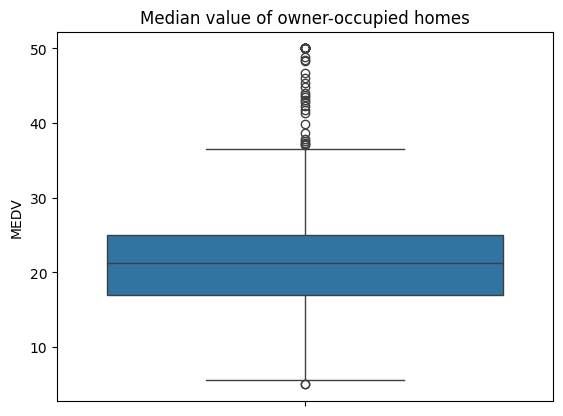

In [11]:
sns.boxplot(y = 'MEDV', data = boston_df)
pyplot.title('Median value of owner-occupied homes')

Text(0.5, 1.0, 'Bar plot for the Charles river variable')

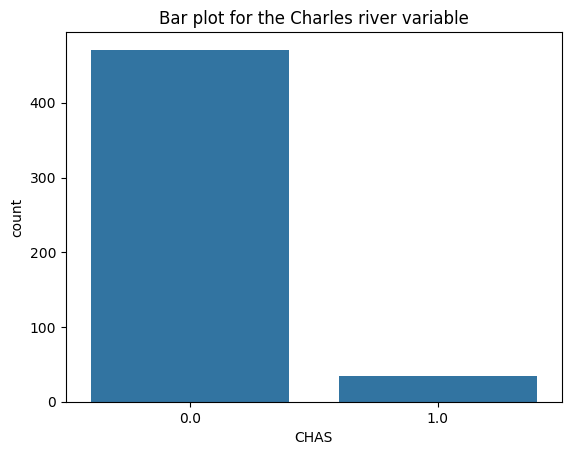

In [36]:
sns.countplot(x = 'CHAS', data = boston_df)
pyplot.title('Bar plot for the Charles river variable')

Text(0.5, 1.0, 'boxplot for the MEDV variable vs the AGE variable.')

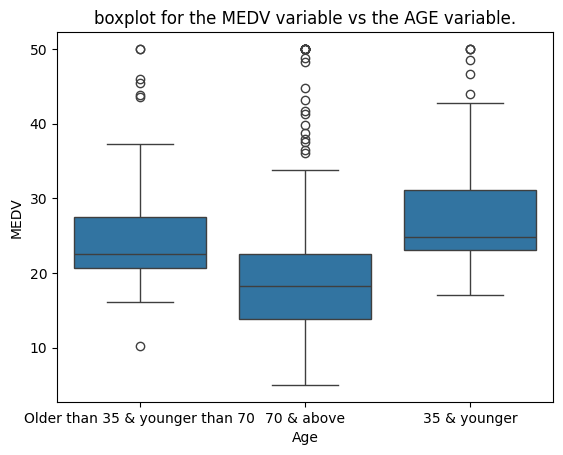

In [23]:
boston_df.loc[(boston_df['AGE'] <= 35), 'Age'] = '35 & younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'Age'] = 'Older than 35 & younger than 70'
boston_df.loc[(boston_df['AGE'] >= 70), 'Age'] = '70 & above'
sns.boxplot(x = 'Age', y = 'MEDV', data = boston_df)
pyplot.title('boxplot for the MEDV variable vs the AGE variable.')

Text(0.5, 1.0, 'relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town')

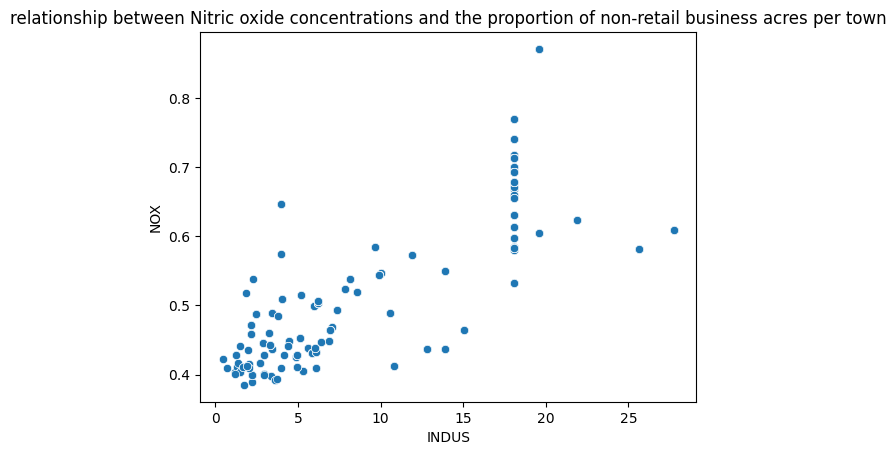

In [34]:
sns.scatterplot(y = 'NOX', x = 'INDUS', data = boston_df)
pyplot.title('relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town')
#low Nitric oxide concentration comes with low proportion of non-retail business acres per town, also high itric oxide concentration comes with high proportion of non-retail business acres per town.


Text(0.5, 1.0, 'histogram for the pupil to teacher ratio variable')

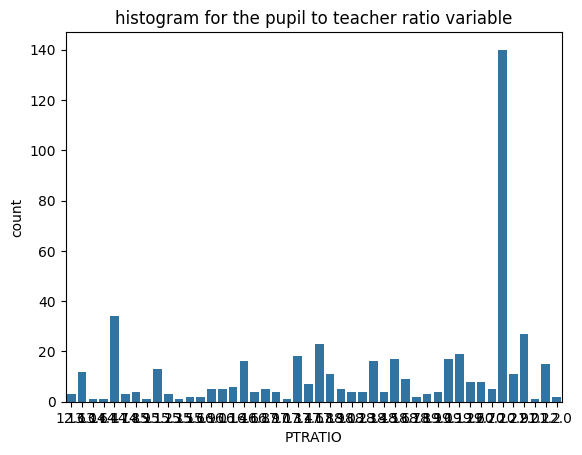

In [33]:
sns.countplot(x = 'PTRATIO', data = boston_df)
pyplot.title('histogram for the pupil to teacher ratio variable')

In [50]:
#hypothesis: there is no significant difference in median value of houses bounded by the Charles river
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'], 
                      boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = True)
#pvalue < 0.05 so we reject hyphotesis that there is no significant difference in median value of houses bounded by the Charles river

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

In [51]:
#hyphotesis: there is a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)
df1 = boston_df[boston_df['Age'] == '35 & younger']['MEDV']
df2 = boston_df[boston_df['Age'] == 'Older than 35 & younger than 70']['MEDV']
df3 = boston_df[boston_df['Age'] == '70 & above']['MEDV']
f_Statistic , p_value=scipy.stats.f_oneway(df1 , df2 , df3)
print(f"P-Value:{p_value}")
#pvalue < 0.05 so we reject hypothesis that there is a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)

P-Value:1.7105011022702984e-15


In [52]:
#hyphotesis: there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
#Pearson Coefficient = 0.7636514469209192 and p-value < 0.05 so we reject hypothesis that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

In [57]:
x = boston_df['DIS']
y = boston_df['MEDV']
x = sm.add_constant(x) 
model = sm.OLS(y, x).fit()
model.summary()
#impact is 1.0916

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 27 Sep 2024   Prob (F-statistic):           1.21e-08
Time:                        11:53:22   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""